In [211]:
from pathlib import Path
import pandas as pd
import numpy as np
import tarfile
import urllib.request
import matplotlib.pyplot as plt

### Load Dataset

In [212]:
def load_houising_data():
    tarball_path = Path("datasets/housing.tgz")

    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)

        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))


In [213]:
housing = load_houising_data()

In [214]:
housing.head(7)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY


In [215]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [216]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [217]:
housing[["total_rooms"]].value_counts()

total_rooms
1527.0         18
1582.0         17
1613.0         17
2127.0         16
1722.0         15
               ..
4698.0          1
4690.0          1
4687.0          1
4685.0          1
39320.0         1
Name: count, Length: 5926, dtype: int64

In [218]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


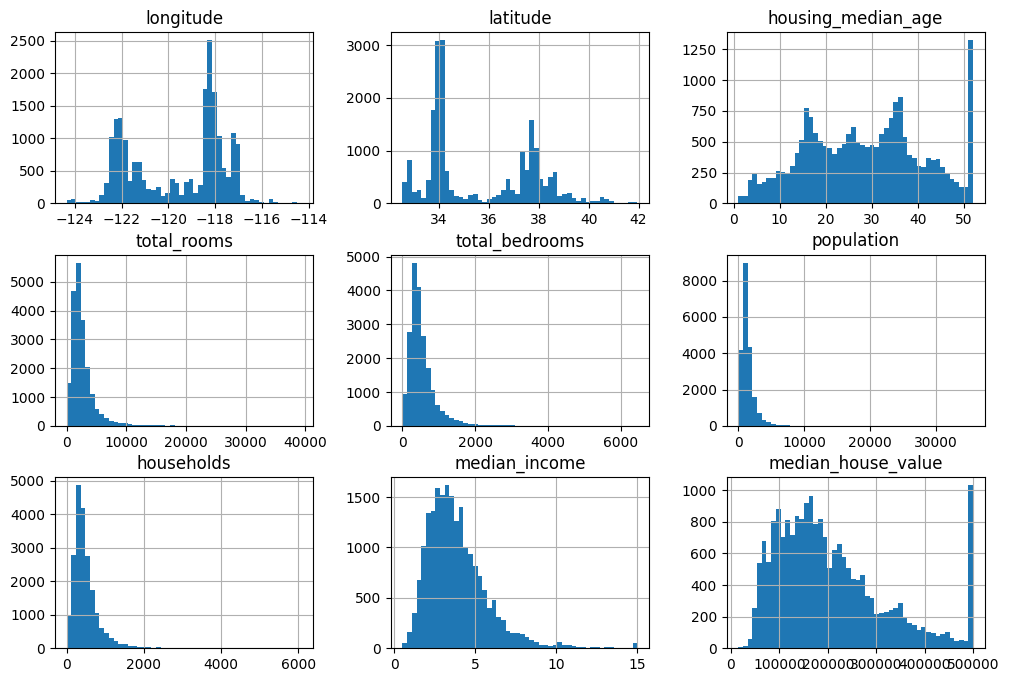

In [219]:
housing.hist(bins=50, figsize=(12,8))
plt.show()

### Train Test Split

In [220]:
def shuffle_and_split_data(data, test_ratio):
    test_ratio = test_ratio/100
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indeces = shuffled_indices[test_set_size:]

    return data.iloc[train_indeces], data.iloc[test_indices]


In [221]:
train_set, test_set = shuffle_and_split_data(housing, 20)

In [222]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
16760,-122.27,40.46,14.0,2633.0,530.0,1324.0,513.0,2.2768,78600.0,INLAND
3506,-119.87,36.93,13.0,1429.0,209.0,702.0,205.0,4.3625,111800.0,INLAND
4882,-117.97,33.99,22.0,5284.0,982.0,2613.0,932.0,4.7332,289900.0,<1H OCEAN
18827,-117.09,32.62,37.0,1538.0,298.0,867.0,285.0,3.0729,128700.0,NEAR OCEAN
5066,-120.81,37.53,15.0,570.0,123.0,189.0,107.0,1.8750,181300.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
8317,-116.23,33.73,29.0,1133.0,221.0,918.0,239.0,2.8648,72100.0,INLAND
16733,-119.79,36.78,38.0,1912.0,456.0,1131.0,408.0,2.0300,58800.0,INLAND
7319,-117.62,33.43,27.0,3858.0,1062.0,2321.0,873.0,3.3155,231000.0,NEAR OCEAN
6182,-121.27,38.74,19.0,3869.0,887.0,2086.0,685.0,2.6065,154900.0,INLAND


In [223]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1428,-121.49,38.53,40.0,2966.0,536.0,1225.0,505.0,3.1250,130600.0,INLAND
6169,-118.06,34.08,37.0,778.0,205.0,850.0,198.0,2.5119,180500.0,<1H OCEAN
9052,-116.96,32.90,16.0,3047.0,495.0,1507.0,499.0,5.3008,186500.0,<1H OCEAN
14210,-121.75,36.93,24.0,4026.0,881.0,2264.0,863.0,3.1327,218100.0,<1H OCEAN
11773,-121.99,37.40,35.0,1845.0,325.0,1343.0,317.0,5.3912,235300.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
19014,-119.09,35.43,28.0,254.0,35.0,118.0,37.0,4.8571,237500.0,INLAND
8661,-120.25,36.65,31.0,1177.0,221.0,744.0,223.0,2.4937,66000.0,INLAND
4493,-121.82,37.36,33.0,1624.0,337.0,1412.0,323.0,4.0385,167600.0,<1H OCEAN
14216,-122.29,37.91,40.0,2085.0,329.0,796.0,339.0,5.5357,273700.0,NEAR BAY


### random seed

In [224]:
from zlib import crc32

In [225]:
"""
def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2 ** 32

def split_data_with_id_hash(data, test_ratio, id_column):
    test_ratio = test_ratio / 100
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_ : is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]
"""

'\ndef is_id_in_test_set(identifier, test_ratio):\n    return crc32(np.int64(identifier)) < test_ratio * 2 ** 32\n\ndef split_data_with_id_hash(data, test_ratio, id_column):\n    test_ratio = test_ratio / 100\n    ids = data[id_column]\n    in_test_set = ids.apply(lambda id_ : is_id_in_test_set(id_, test_ratio))\n    return data.loc[~in_test_set], data.loc[in_test_set]\n'

In [226]:
"""
housing_with_id = housing.reset_index()
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")
"""

'\nhousing_with_id = housing.reset_index()\ntrain_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")\n'

In [227]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing ,test_size=0.2, random_state=42)

In [228]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.22,32.75,34.0,6001.0,1111.0,2654.0,1072.0,4.5878,291000.0,NEAR OCEAN
8267,-117.03,32.69,10.0,901.0,163.0,698.0,167.0,4.6648,156100.0,NEAR OCEAN
17445,-122.27,37.74,28.0,6909.0,1554.0,2974.0,1484.0,3.6875,353900.0,NEAR BAY
14265,-121.82,37.25,25.0,4021.0,634.0,2178.0,650.0,5.1663,241200.0,<1H OCEAN
2271,-115.98,33.32,8.0,240.0,46.0,63.0,24.0,1.4688,53800.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11284,-122.37,37.94,49.0,969.0,229.0,599.0,195.0,1.3167,71600.0,NEAR BAY
11964,-118.38,33.89,35.0,1778.0,330.0,732.0,312.0,6.5745,379300.0,<1H OCEAN
5390,-119.33,36.28,16.0,2624.0,527.0,1077.0,520.0,2.1250,104200.0,INLAND
860,-117.19,34.08,22.0,2467.0,555.0,1567.0,494.0,2.6536,84700.0,INLAND


In [229]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-122.38,40.67,10.0,2281.0,444.0,1274.0,438.0,2.2120,65600.0,INLAND
3024,-118.37,33.83,35.0,1207.0,207.0,601.0,213.0,4.7308,353400.0,<1H OCEAN
15663,-117.24,32.72,39.0,3089.0,431.0,1175.0,432.0,7.5925,466700.0,NEAR OCEAN
20484,-118.44,34.05,18.0,4780.0,1192.0,1886.0,1036.0,4.4674,500001.0,<1H OCEAN
9814,-118.44,34.18,33.0,2127.0,414.0,1056.0,391.0,4.3750,286100.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15362,-121.92,40.52,13.0,4581.0,881.0,1799.0,734.0,2.2993,99500.0,INLAND
16623,-122.08,37.68,26.0,2607.0,682.0,1401.0,607.0,2.6563,184100.0,NEAR BAY
18086,-119.00,35.39,42.0,2839.0,516.0,1203.0,487.0,3.7708,79400.0,INLAND
2144,-117.92,33.63,39.0,1469.0,226.0,553.0,225.0,7.8496,490800.0,<1H OCEAN


In [230]:
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1, 2, 3, 4, 5])

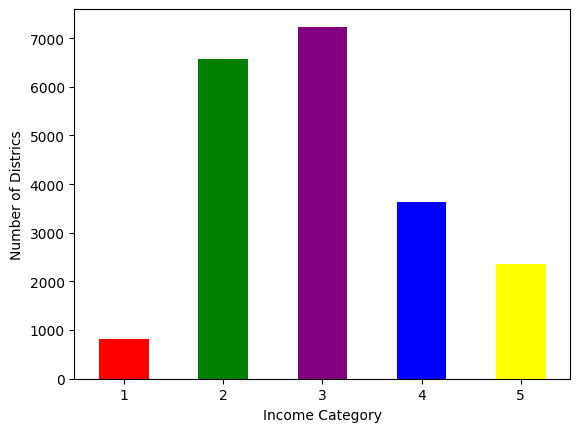

In [231]:
colors = ['red', 'green', 'purple', 'blue', 'yellow']
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, color=colors)
plt.xlabel("Income Category")
plt.ylabel("Number of Districs")
plt.show()

In [232]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splitz = []

for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splitz.append([strat_train_set_n, strat_test_set_n])

In [233]:
strat_train_set, strat_test_set = strat_splitz[0]

In [234]:
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [235]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [236]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [237]:
housing = strat_train_set.copy()

In [238]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,500001.0,<1H OCEAN
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,88800.0,INLAND
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,148800.0,NEAR OCEAN
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,500001.0,<1H OCEAN


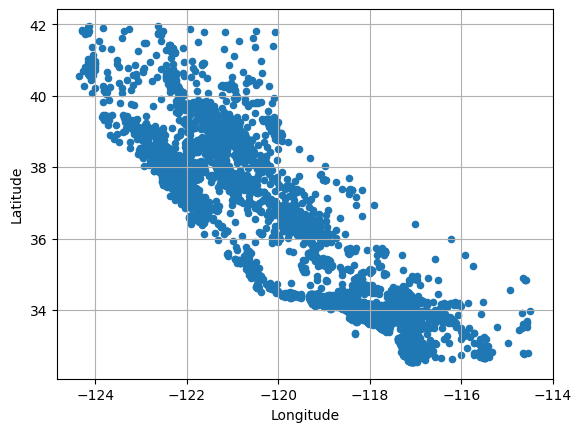

In [248]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=1)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

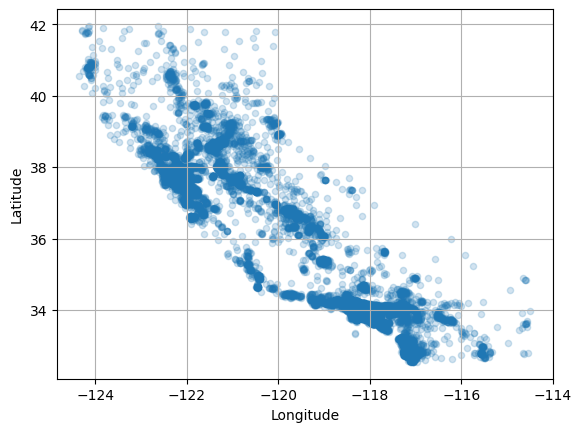

In [249]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

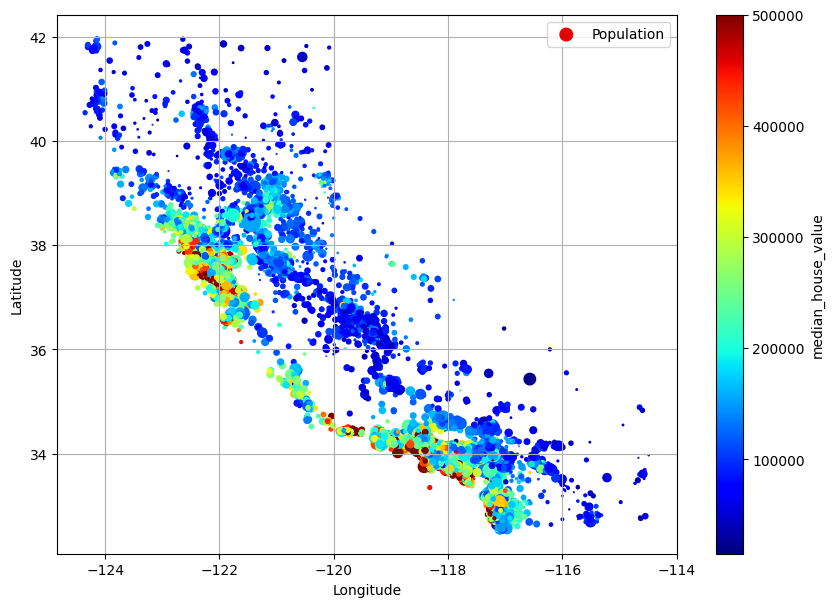

In [252]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, 
            s=housing["population"]/100, label="Population",
            c="median_house_value", cmap="jet", colorbar=True, legend=True, sharex=False, figsize=(10,7))
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()